# The Central Limit Theorem

Fall 2022: Peter Ralph

https://uodsci.github.io/dsci345

In [1]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (15, 8)
import numpy as np
import pandas as pd

rng = np.random.default_rng()

In [2]:
def pretty(x, n):
    """
    Returns a "pretty" set of bin boundaries roughly of size n
    that span x. Use, for instance, like:
      plt.hist(x, bins=pretty(x, 40))
    """
    # see https://github.com/wch/r-source/blob/trunk/src/appl/pretty.c
    h = 1.5
    h5 = .5 + 1.5 * h
    lo = np.nanmin(x)
    up = np.nanmax(x)
    assert lo < up, "All values are the same."
    c = (up - lo) / n
    b = 10 ** np.floor(np.log10(c))
    m = [1, (2+h)/(1+h), (5+2*h5)/(1+h5), (10+5*h)/(1+h), 10]
    k = np.digitize(c/b, m)
    u = b * [1, 2, 5, 10][k - 1]
    ns = np.floor(lo / u + 1e-10)
    nu = np.ceil(up / u - 1e-10)
    return np.arange(ns * u, (nu + 1) * u, u)

$$\renewcommand{\P}{\mathbb{P}} \newcommand{\E}{\mathbb{E}} \newcommand{\var}{\text{var}} \newcommand{\sd}{\text{sd}}$$
This is here so we can use `\P` and `\E` and `\var` and `\sd` in LaTeX below.

# Estimating means

Suppose we have lots of observations of something and want to estimate the mean
(i.e., the mean value of the source we're getting the observations from).
"Obviously", we should use the *sample mean*:
$$ \bar X = \frac{1}{n} \left( X_1 + X_2 + \cdots + X_n \right) . $$

Let's suppose that all the $X_i$ are independent copies of some random variable,
and that
$$  \E[X_i] = \mu \qquad \text{and} \qquad \var[X_i] = \sigma^2 .$$

We'd like to infer the value of $\mu$.

Is this a sensible thing to do? Well,
by linearity of $\E[ ]$,
$$\begin{aligned}
    \E[\bar X]
    &=
    \E[ \frac{1}{n} \left( X_1 + \cdots + X_n \right) ]
    \\ &=
    \frac{1}{n} \left( \E[X_1] + \cdots + \E[X_n] \right)
    \\ &=
    \frac{1}{n} \left( \mu + \cdots + \mu \right)
    \\ &=
    \mu .
\end{aligned}$$

Okay, that's a good sign? But, it's nice to know how far of it would be in practice.

To see how far off it would tend to be, let's compute the standard deviation;
as usual, it's easier to compute the variance (then we take the square root).
Since the $X_i$ are independent, the variance of their sum is the sum of their variances,
and also $\var[a X] = a^2 \var[X]$,
so
$$\begin{aligned}
    \var[\bar X]
    &=
    \var[ \frac{1}{n} \left( X_1 + \cdots + X_n \right) ]
    \\ &=
    \frac{1}{n^2} \left( \var[X_1] + \cdots + \var[X_n] \right)
    \\ &=
    \frac{\sigma^2}{n} .
\end{aligned}$$

So,
$$ \sd[\bar X] = \frac{\sigma}{\sqrt{n}} . $$

We've learned that $\bar X$ is an unbiased estimator of $\mu$,
with an error of order $\sigma/\sqrt{n}$.

**Next:** can we say more about the error? *Yes*, amazingly.

# The central limit theorem

The **central limit theorem** says that* if $\bar X = (X_1 + \cdot + X_n)/n$
is the sample mean of $n$ independent random variables
that each have mean $\mu$ and standard deviation $\sigma$,
then
$$
    \P\left\{
        \frac{ \bar X - \mu }{ \sigma / \sqrt{n} }
        > 
        x
    \right\}
    \approx
    \int_x^\infty \frac{e^{-y^2 / 2}}{\sqrt{2 \pi}} dy ,
$$
i.e., $\bar X$ has a distribution that is approximation Normal,
with mean $\mu$ and standard deviation $\sigma/\sqrt{n}$.

$^*$ *note:* the approximation is better the bigger $n$ is
and the "less weird" the distribution of $X_i$ is.

How big, and how weird? Good question - an easy answer comes by simulation.

# Adding up lots of little things

We've talked about the Central Limit Theorem,
a.k.a., "Normal approximation" or "Gaussian approximation".
Let's see how to works in practice!

## Random walk

Let's suppose we take a walk as follows:
flip a fair coin; if heads, go one step north; if tails, go one step south.
Let $X_k = +1$ if we go north of the $k^\text{th}$ step, and $X_k = -1$ if we go south,
and $S_n = X_1 + X_2 + \cdots + X_n$ be the displacement to the north after $n$ steps.

Note that
$$ \E[X_k] = 0 \qquad \text{and} \qquad \sd[X_k] = 1 , $$
so
$$ \E[S_n] = 0 \qquad \text{and} \qquad \sd[S_n] = \sqrt{n} . $$

Let's investigate. Here's one walk:

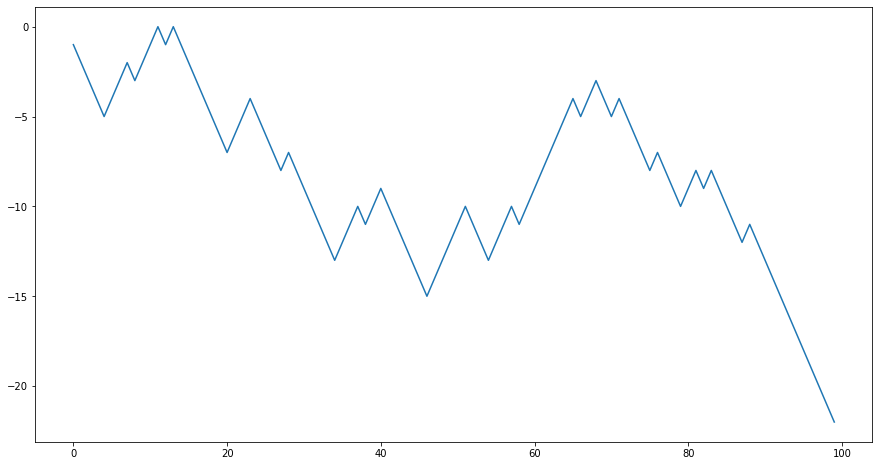

In [3]:
n = 100
X = rng.choice([-1, 1], size=n, replace=True)
S = np.cumsum(X)
plt.plot(S);

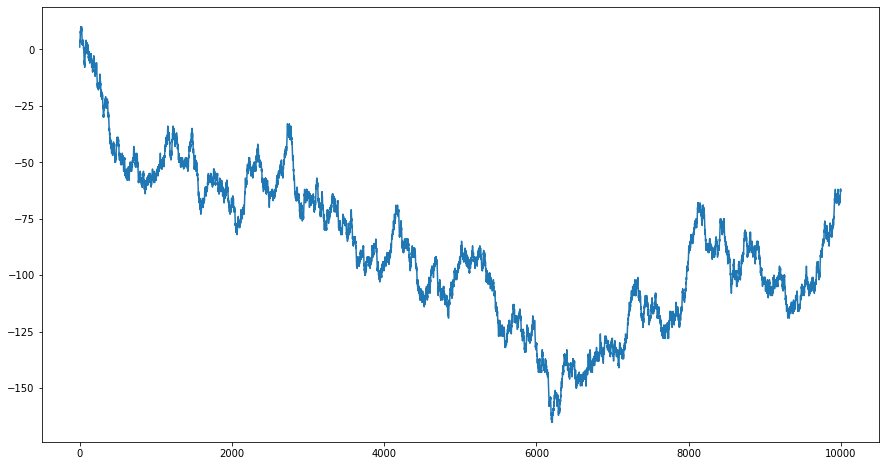

In [4]:
n = 10000
X = rng.choice([-1, 1], size=n, replace=True)
S = np.cumsum(X)
plt.plot(S);

Here's lots of walks, and only the distribution of $S_n$, i.e., where they end up.

In [5]:
def walks(n, size):
    X = rng.choice([-1, 1], size=(size, n))
    S = np.sum(X, axis=1)
    return S

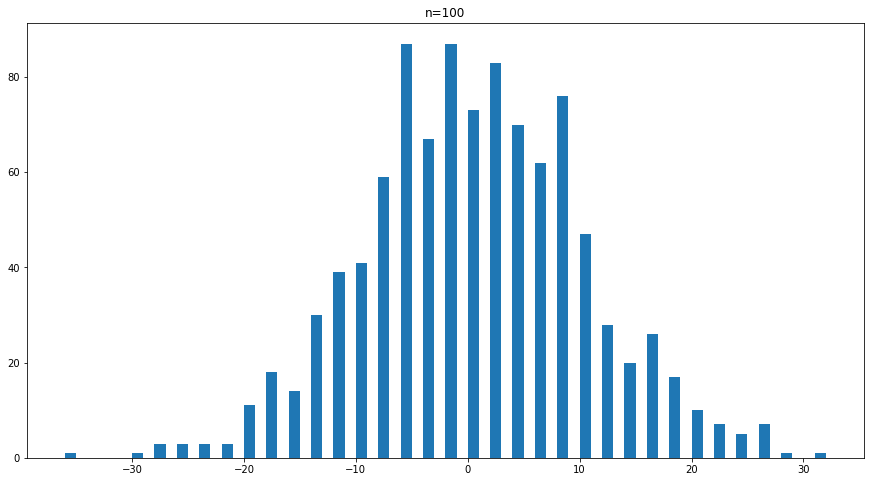

In [6]:
# note: see the source for the definition of `pretty( )`
n = 100
S = walks(n=n, size=1000)
plt.hist(S, bins=pretty(S, 50))
plt.title(f"n={n}");

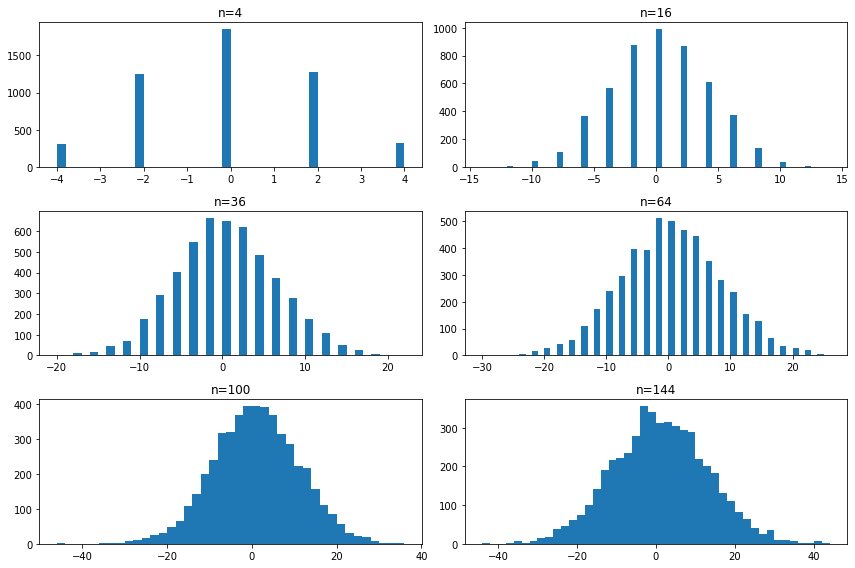

In [7]:
fig, axes = plt.subplots(3, 2, figsize=(12, 8))
for k, ax in enumerate(axes.flatten()):
    n = 4 * (k+1)**2
    S = walks(n=n, size=5000)
    ax.hist(S, bins=pretty(S, 50))
    ax.set_title(f"n={n}")
plt.tight_layout()

# Total energy

Let's say now that $X_1, X_2, \ldots$ are independent Exponential(1) random variables.
Their sum has mean $n$, so let's look at
 $$ S_n = X_1 + \cdots + X_n  - n . $$
 
*Exercise:* Make up a story for what $S_n$ is.

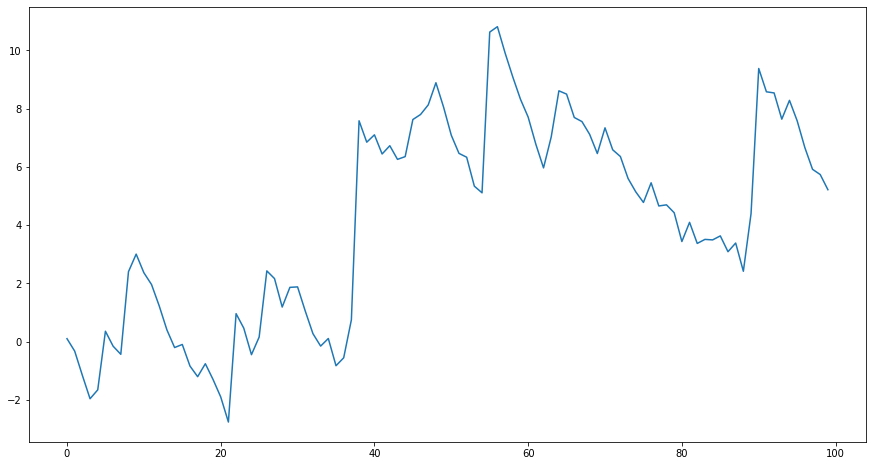

In [8]:
n = 100
X = rng.exponential(1, size=n) - 1
S = np.cumsum(X)
plt.plot(S);

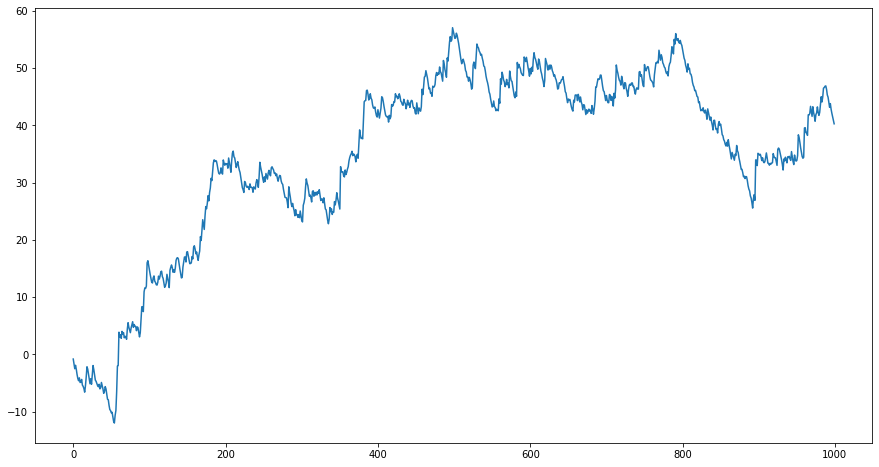

In [9]:
n = 1000
X = rng.exponential(1, size=n) - 1
S = np.cumsum(X)
plt.plot(S);

In [10]:
def exp_walks(n, size):
    X = rng.exponential(1, size=(size, n))
    S = np.sum(X, axis=1)
    return S

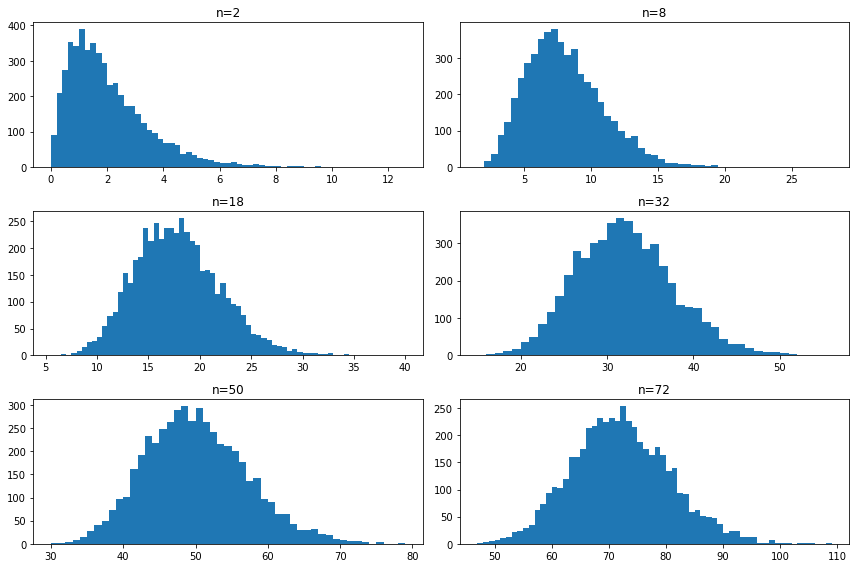

In [11]:
fig, axes = plt.subplots(3, 2, figsize=(12, 8))
for k, ax in enumerate(axes.flatten()):
    n = 2 * (k+1)**2
    S = exp_walks(n=n, size=5000)
    ax.hist(S, bins=pretty(S, 50))
    ax.set_title(f"n={n}")
plt.tight_layout()

# Example: counting bikes

Suppose we are estimating bike lane usage
by counting bikes from 5-6pm every day at a particular spot.
If we do it for 25 days,
and the number per day has mean 120 with standard deviation 50,
how close will our average be to 120?

Well, $\bar X$ is the average number of bikes/day over $n=25$ days,
so we know that $\E[\bar X] = \mu = 120$ bikes,
and $\sd[\bar X] = \sigma / \sqrt{n} = 50 / \sqrt{25} = 10$ bikes...
so, within $\pm 20$ bikes or so?

More precisely,
$$ \bar X \approx \text{Normal}(\text{mean}=120, \text{sd}=10) ,$$
so
$$
 \P\left\{
 | \bar X - 120 | > x
 \right\}
 \approx
 2 \int_{10x}^\infty \frac{e^{-y^2/2}}{\sqrt{2 \pi}} dy .
$$

# Example: jelly beans

Each bag of jelly beans has 100 beans in it.
The average weight per bag is 240g,
with and SD of 10g.
Bags weighing less than 210g can't be sold.
What percent of the bags are too light?

Well, probably
$$ W \sim \text{Normal}(\text{mean}=240g, \text{sd}=10g), $$
so the proportion is probably close to
$$
    \P\{W < 210g\}
    =
    \P\{ \frac{W - 240}{10} < -3 \}
    \approx
    \int_{-\infty}^{-3}
    \frac{e^{-y^2/2}}{\sqrt{2\pi}}
    dy .
$$

Note what we did there - to answer the question, we needed
to know the *probability distribution* of $W$, which was not stated,
only the mean and SD>
So, we said that "gee since it's the sum of a bunch of things it's probably Normal".